In [1]:
import cirq
import numpy as np
import random
from cirq.contrib.svg import SVGCircuit
from IPython.display import display

In [2]:
def oracle(circuit, data_reg, y_reg, is_balanced=True):
    if is_balanced:
        circuit.append([
            cirq.CNOT(data_reg[0], y_reg),
            cirq.CNOT(data_reg[1], y_reg)
        ])
    return circuit

In [3]:
def deutsch_jozsa_game(domain_size=4, copies=1000):
    # Step 1: Decide if the oracle will be balanced or constant
    is_balanced = random.choice([True, False])

    # Step 2: Explain the rules to the player
    print("Welcome to 'The Oracle's Secret'!")
    print("You need to figure out if the oracle is balanced or constant.")
    print("Balanced means the oracle returns 0 for half the inputs and 1 for the other half.")
    print("Constant means the oracle returns the same value for all inputs.")
    
    # Ask the player to guess
    player_guess = input("What's your guess? (balanced/constant): ").strip().lower()

    # Set up the quantum circuit
    reqd_num_qubits = int(np.ceil(np.log2(domain_size)))
    data_reg = [cirq.LineQubit(i) for i in range(reqd_num_qubits)]
    y_reg = cirq.LineQubit(reqd_num_qubits)
    
    circuit = cirq.Circuit()

    # Step 1: Put the input qubits into an equal superposition state
    circuit.append([cirq.H(q) for q in data_reg])

    # Step 2: Prepare the target qubit in the |-⟩ state
    circuit.append([cirq.X(y_reg), cirq.H(y_reg)])

    # Display the circuit after initialization
    print("\nCircuit after initialization (superposition and target preparation):")
    display(SVGCircuit(circuit))

    # Step 3: Apply the Oracle
    circuit = oracle(circuit, data_reg, y_reg, is_balanced)

    # Display the circuit after applying the oracle
    print("\nCircuit after applying the Oracle:")
    display(SVGCircuit(circuit))

    # Step 4: Apply Hadamard transform on each of the input qubits again
    circuit.append([cirq.H(q) for q in data_reg])

    # Step 5: Measure the input qubits
    circuit.append(cirq.measure(*data_reg, key='result'))

    # Display the final circuit before simulation
    print("\nFinal Circuit before measurement:")
    display(SVGCircuit(circuit))

    # Simulate the circuit
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=copies)
    counts = result.histogram(key='result')

    # Determine if the oracle was balanced or constant based on the measurement
    if 0 in counts:
        algorithm_guess = "constant"
    else:
        algorithm_guess = "balanced"

    # Display results
    print(f"\nQuantum algorithm determined the oracle is {algorithm_guess}.")
    print(f"The oracle was actually {('balanced' if is_balanced else 'constant')}.")
    print(f"Your guess was {player_guess}.")
    
    if player_guess == algorithm_guess:
        print("Congratulations! Your guess matches the quantum algorithm's result!")
    else:
        print("The quantum algorithm outperformed your guess. Better luck next time!")

    # Show the histogram of results
    print("\nHistogram of measurement results:")
    for outcome, count in counts.items():
        print(f"{bin(outcome)[2:]:>0{reqd_num_qubits}}: {count}")

Welcome to 'The Oracle's Secret'!
You need to figure out if the oracle is balanced or constant.
Balanced means the oracle returns 0 for half the inputs and 1 for the other half.
Constant means the oracle returns the same value for all inputs.


What's your guess? (balanced/constant):  constant



Circuit after initialization (superposition and target preparation):


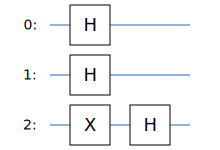


Circuit after applying the Oracle:


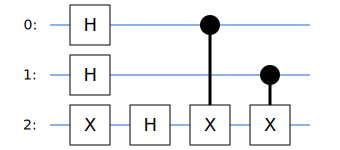


Final Circuit before measurement:


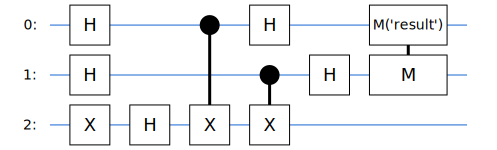


Quantum algorithm determined the oracle is balanced.
The oracle was actually balanced.
Your guess was constant.
The quantum algorithm outperformed your guess. Better luck next time!

Histogram of measurement results:
11: 1000


In [4]:
if __name__ == '__main__':
    deutsch_jozsa_game()